In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Предобработка

In [2]:
data = pd.read_csv("responses.csv")

In [3]:
data.shape

(3305, 32)

In [4]:
data = data.dropna()

In [5]:
data.shape

(3160, 32)

In [7]:
data["broken a bone"].apply(int)

1       0
2       0
3       0
4       0
5       0
       ..
3300    0
3301    1
3302    0
3303    1
3304    0
Name: broken a bone, Length: 3160, dtype: int64

In [11]:
for a in data.columns[2:]:
    data[a] = data[a].apply(int)

In [17]:
cat, cnt = np.unique(
    data["Age range"].values, return_counts = True
)

In [22]:
cat

array(['0-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74',
       '75+'], dtype=object)

In [30]:
cnt

array([ 723, 1391,  821,  165,   40,   14,    4,    2])

In [28]:
b1 = data["Age range"] == "75+"
b2 = data["Age range"] == "65-74"
b3 = np.logical_and(np.logical_not(b1.values), np.logical_not(b2.values))

In [31]:
data = data[b3]

In [33]:
A = "sung in the shower"
B = "fallen down the stairs"

In [37]:
a_vals, a_cnts = np.unique(data[A].values, return_counts=True)
b_vals, b_cnts = np.unique(data[B].values, return_counts=True)

In [38]:
a_cnts/data.shape[0]

array([0.11160431, 0.88839569])

In [39]:
b_cnts/data.shape[0]

array([0.24223209, 0.75776791])

In [49]:
def percentage_table(a, first, last):
    return(pd.crosstab(a[first], a[last])/a.shape[0])

In [79]:
lpt = [
    percentage_table(data[data["Age range"]==a], A, B) for a in cat[:-2]
]

In [83]:
lpt_sung = [a.iloc[-1].sum() for a in lpt]

In [99]:
lpt_sungfall = [a.iloc[-1][1] for a in lpt]

<BarContainer object of 6 artists>

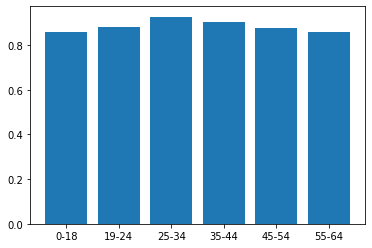

In [86]:
plt.bar(cat[:-2], lpt_sung)

<BarContainer object of 6 artists>

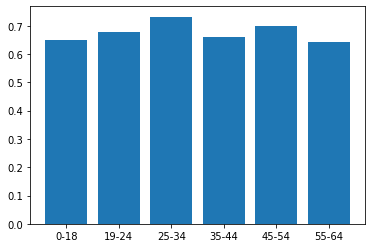

In [100]:
plt.bar(cat[:-2], lpt_sungfall)

In [96]:
for a in data.columns:
    if np.unique(data[a]).shape[0] == 1:
        print(a)

In [98]:
sorted(
    data.columns, 
    key=lambda x: np.unique(data[x], return_counts=True)[1][1]
)

['Timestamp',
 'ridden on a sheep',
 'ridden on a bull',
 'gone skydiving',
 'ran a marathon',
 'been shown on a JumboTron at a sporting event',
 'been on water skis',
 'been stung by a jellyfish',
 "paid for a stranger's meal",
 'gotten a speeding ticket',
 'been in a major natural disaster',
 'broken a bone',
 'been alpine skiing',
 'been on a motorcycle',
 'Age range',
 'driven a boat',
 'been pooped on by a bird',
 'gotten stitches',
 'regifted a gift',
 'been on the radio or television',
 'had braces',
 'been to Europe',
 'had your cell phone ring at an embarrassing moment',
 'held a butterfly in your hand',
 'been horseback riding',
 'had a tooth pulled out',
 'had contacts or glasses',
 'fallen down the stairs',
 'gotten locked out of your car or house',
 'faked being sick',
 'sung in the shower',
 'stayed awake for an entire night']

In [97]:
np.unique([1,1,1])

array([1])

In [66]:
u = pd.DataFrame(
    {"index": ["a", "b", "c", "d"], "value": np.arange(4)}
)

In [68]:
u.index = u["index"]

In [73]:
u.loc["a"]

index    a
value    0
Name: a, dtype: object

In [53]:
lpt[1]

fallen down the stairs,0,1
sung in the shower,,
0,0.040259,0.080518
1,0.202732,0.676492


In [54]:
lpt[2]

fallen down the stairs,0,1
sung in the shower,,
0,0.025579,0.047503
1,0.194884,0.732034


In [55]:
lpt[3]

fallen down the stairs,0,1
sung in the shower,,
0,0.030303,0.066667
1,0.242424,0.660606


In [56]:
lpt[4]

fallen down the stairs,0,1
sung in the shower,,
0,0.100,0.025
1,0.175,0.700


In [57]:
lpt[5]

fallen down the stairs,0,1
sung in the shower,,
0,0.000000,0.142857
1,0.214286,0.642857
